In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

importing the dataset


In [ ]:
upi_transactions = pd.read_csv('/content/UPIFraudDetection.csv')

In [ ]:
upi_transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
upi_transactions.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
69853,9,PAYMENT,30681.62,C849962043,0.0,0.0,M64549705,0.0,0.0,0.0,0.0
69854,9,PAYMENT,2866.47,C258151288,0.0,0.0,M1910014593,0.0,0.0,0.0,0.0
69855,9,PAYMENT,2926.88,C145336381,0.0,0.0,M1278169306,0.0,0.0,0.0,0.0
69856,9,PAYMENT,3704.30,C1539334900,0.0,0.0,M1849245575,0.0,0.0,0.0,0.0
69857,9,PAYMENT,248.82,C731155005,0.0,0.0,M495695381,0.0,NaN,NaN,NaN


In [ ]:
upi_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


checking the number of missing values in the each column

In [ ]:
upi_transactions.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
upi_transactions['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
dict = {'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5}
upi_transactions['type'] = upi_transactions['type'].map(dict)


In [ ]:
upi_transactions.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
upi_transactions.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69858.000000,69858.000000,6.985800e+04,6.985800e+04,6.985800e+04,6.985800e+04,6.985700e+04,69857.000000,69857.0
mean,7.893326,2.115606,1.640176e+05,9.043066e+05,9.202980e+05,8.543522e+05,1.185141e+06,0.001532,0.0
std,1.874512,0.964123,3.313730e+05,2.791616e+06,2.829881e+06,2.403000e+06,2.871791e+06,0.039107,0.0
min,1.000000,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.000000,9.011012e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.000000,4.404918e+04,1.990850e+04,0.000000e+00,1.416050e+04,2.113068e+04,0.000000,0.0
75%,9.000000,3.000000,1.991307e+05,1.721175e+05,1.940205e+05,5.186073e+05,9.824113e+05,0.000000,0.0
max,9.000000,5.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [ ]:
upi_transactions.drop(['step','isFlaggedFraud'],axis =1,inplace = True)

In [ ]:
upi_transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


no requirement of the sender and the reciever column for analysis so dropping those columns

In [ ]:
upi_transactions.drop(['nameOrig','nameDest'],axis = 1,inplace=True)

In [ ]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,2,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
upi_transactions.tail()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
69853,2,30681.62,0.0,0.0,0.0,0.0,0.0
69854,2,2866.47,0.0,0.0,0.0,0.0,0.0
69855,2,2926.88,0.0,0.0,0.0,0.0,0.0
69856,2,3704.30,0.0,0.0,0.0,0.0,0.0
69857,2,248.82,0.0,0.0,0.0,NaN,NaN


<Axes: xlabel='amount'>

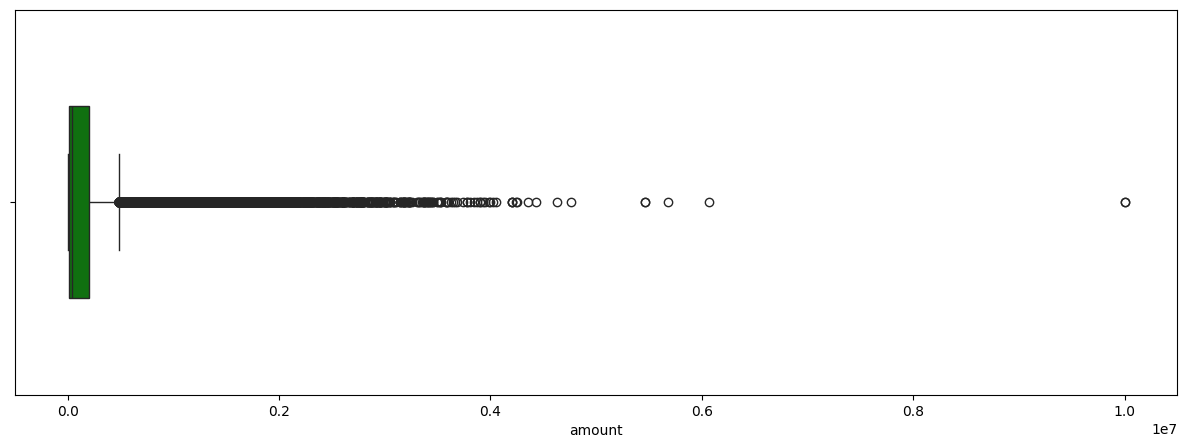

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=upi_transactions.amount,color='green',width=0.5)

<Axes: xlabel='oldbalanceOrg'>

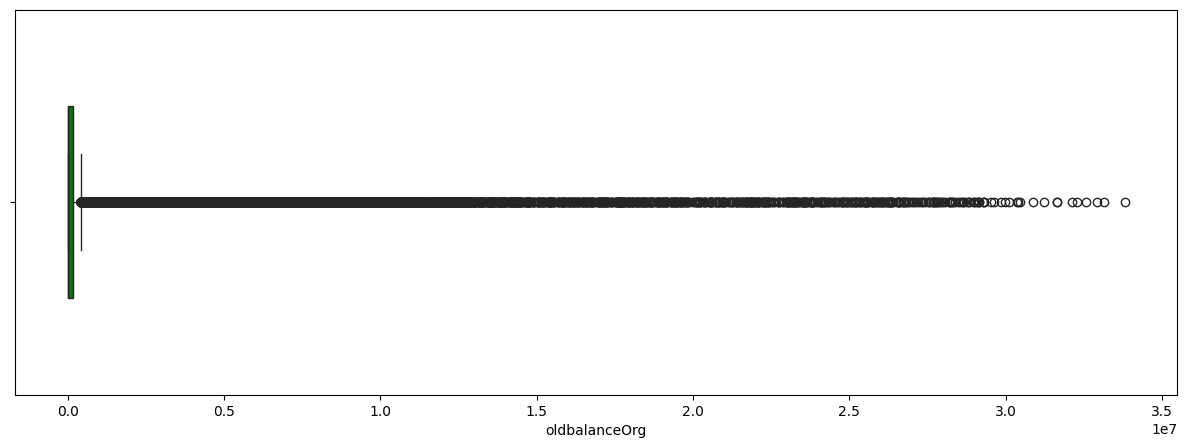

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.oldbalanceOrg,color='green',width=0.5)

<Axes: xlabel='newbalanceOrig'>

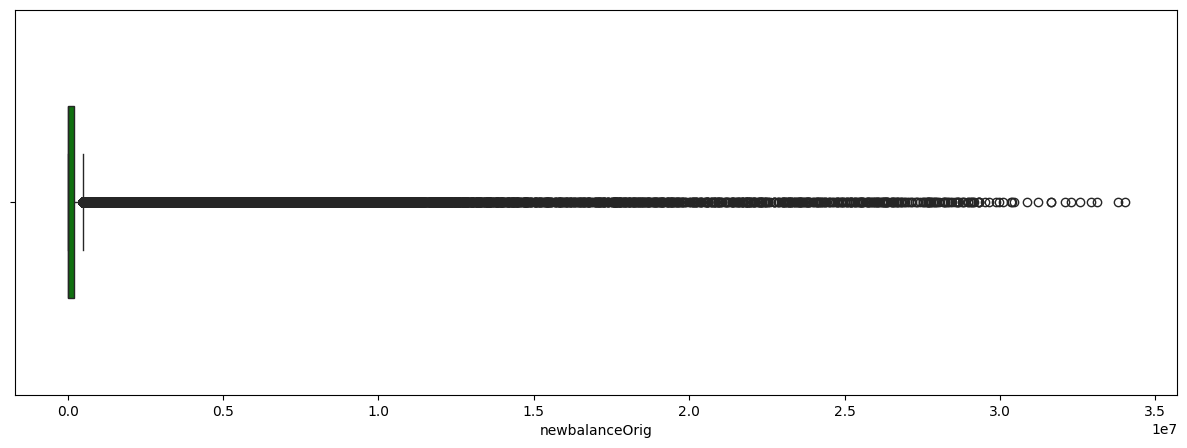

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.newbalanceOrig,color='green',width=0.5)

<Axes: xlabel='oldbalanceDest'>

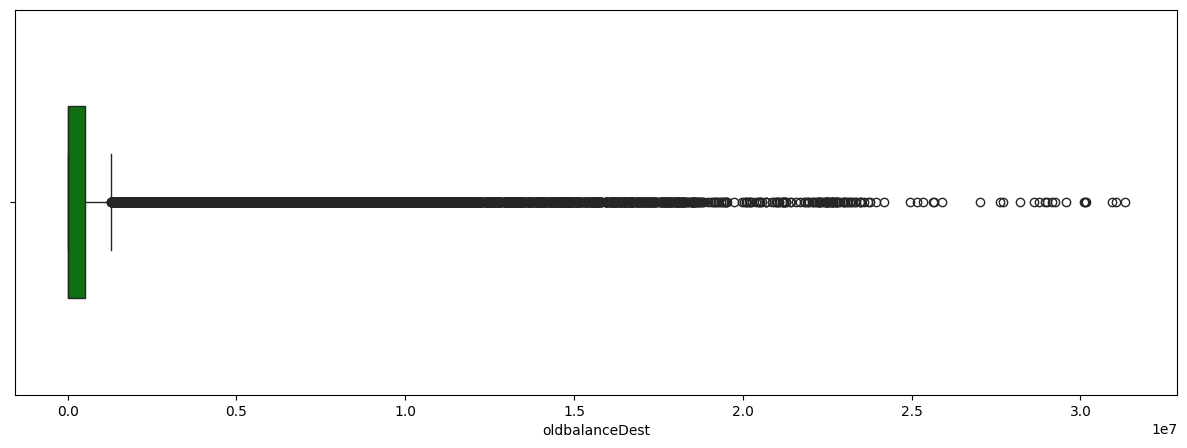

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.oldbalanceDest,color='green',width=0.5)

<Axes: xlabel='newbalanceDest'>

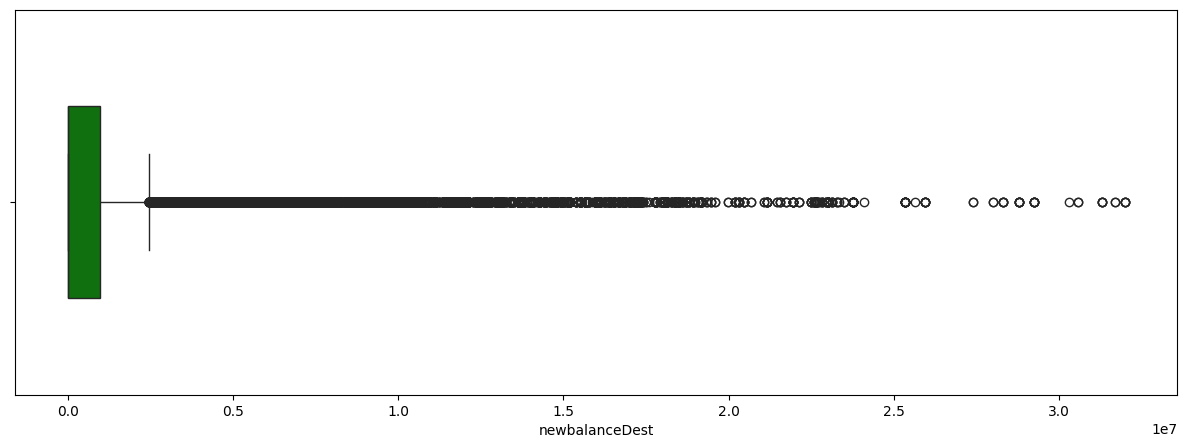

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.newbalanceDest,color='green',width=0.5)

Exploratory data analysis procedure

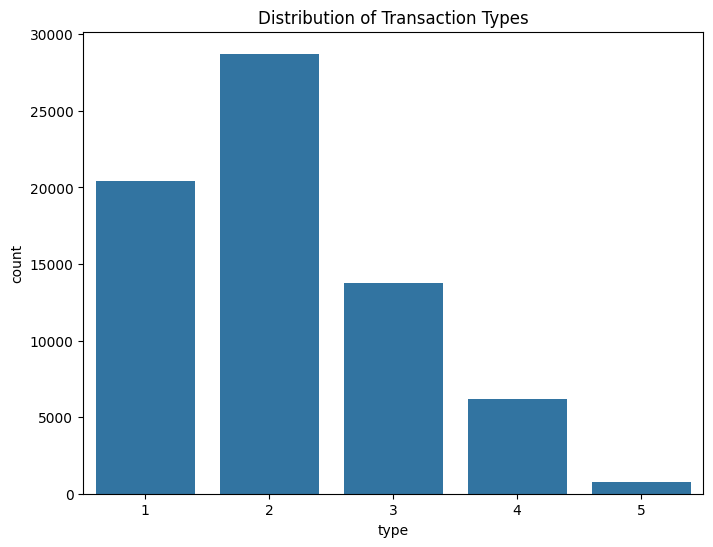

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=upi_transactions)
plt.title('Distribution of Transaction Types')
plt.show()

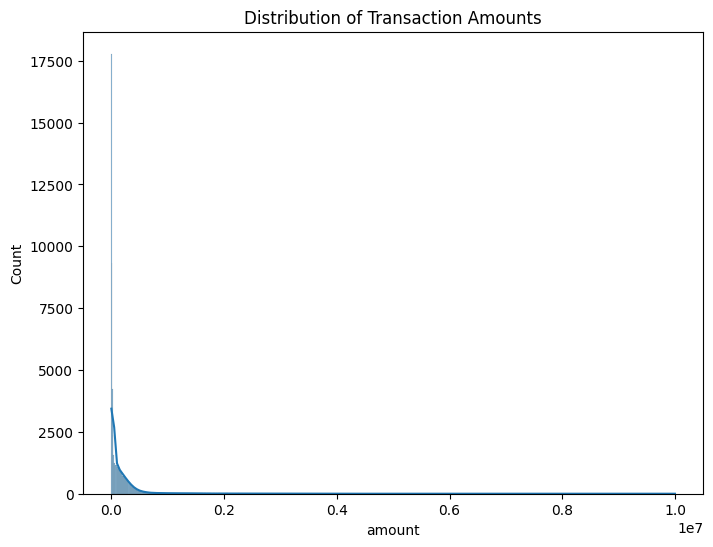

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='amount', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

In [ ]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,2,11668.14,41554.0,29885.86,0.0,0.0,0.0


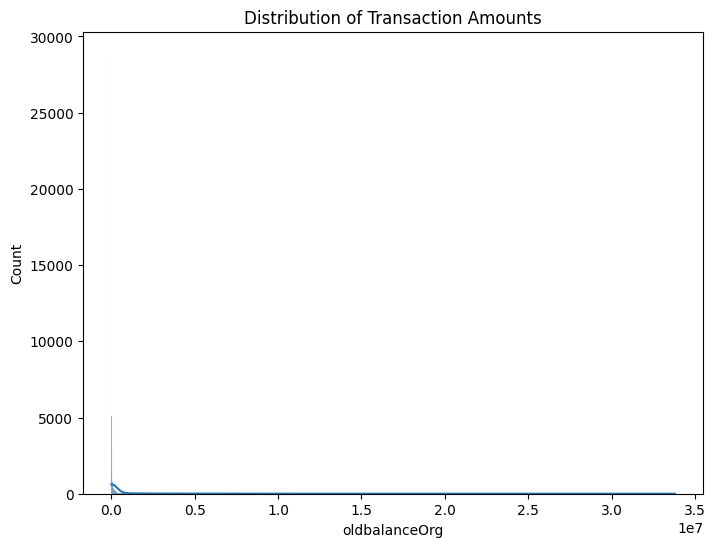

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='oldbalanceOrg', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

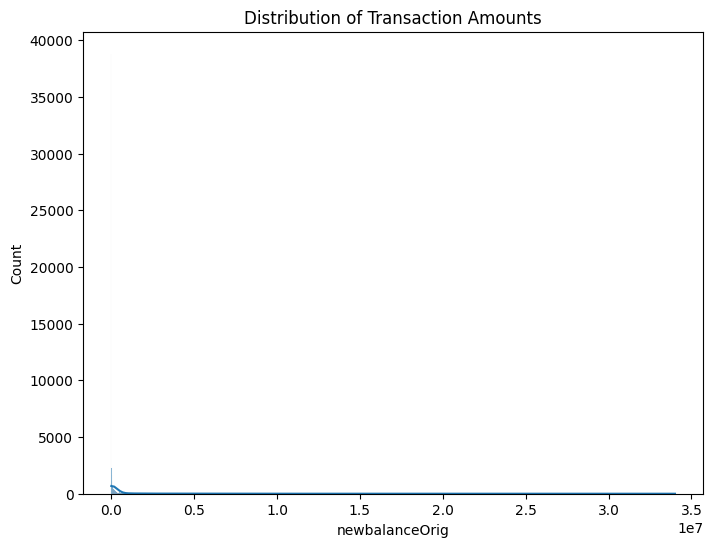

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='newbalanceOrig', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

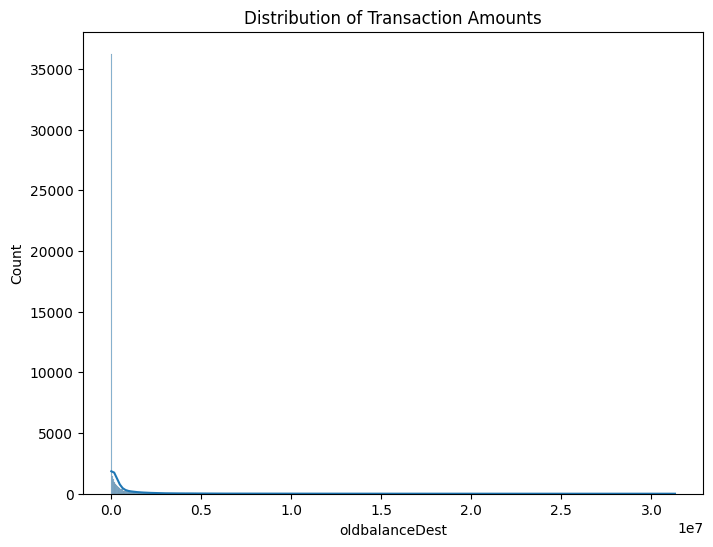

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='oldbalanceDest', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

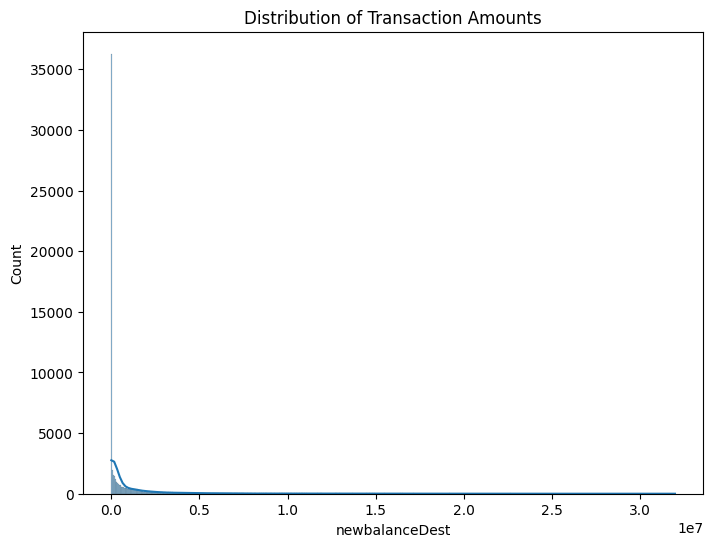

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='newbalanceDest', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

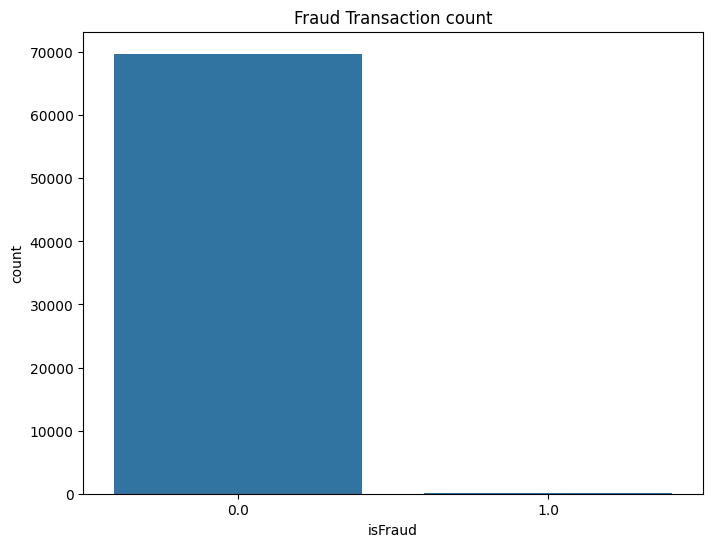

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=upi_transactions)
plt.title('Fraud Transaction count')
plt.show()

<Axes: >

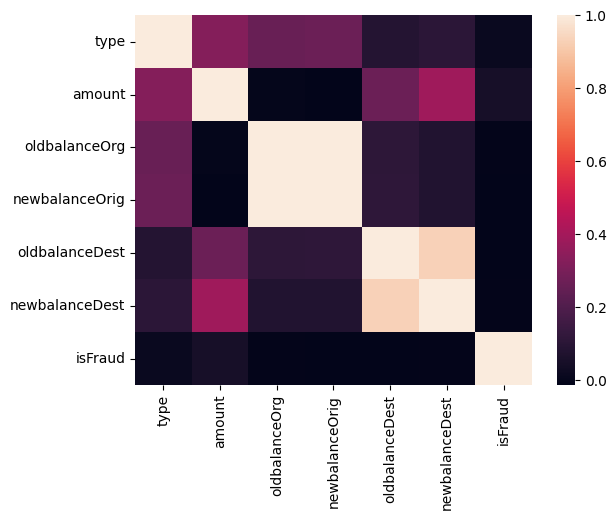

In [ ]:
sns.heatmap(upi_transactions.corr())
#using correlation

In [ ]:
columns = upi_transactions.columns.tolist()
columns = [c for c in columns if c not in ["isFraud"]]
target = "isFraud"
state = np.random.RandomState(42)
x = upi_transactions[columns]
y = upi_transactions[target]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(69858, 6)
(69858,)


In [ ]:
fraud =upi_transactions[upi_transactions['isFraud']==1]
legal_transction = upi_transactions[upi_transactions['isFraud']==0]

In [ ]:
print(fraud.shape,legal_transction.shape)

(107, 7) (69750, 7)


In [ ]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,2,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
fraud.amount.describe()

count    1.070000e+02
mean     5.676905e+05
std      1.595400e+06
min      1.640000e+02
25%      1.494984e+04
50%      3.052102e+04
75%      3.065701e+05
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
legal_transction.amount.describe()

count    6.975000e+04
mean     1.634007e+05
std      3.253601e+05
min      6.300000e-01
25%      9.002173e+03
50%      4.409238e+04
75%      1.990586e+05
max      6.072832e+06
Name: amount, dtype: float64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imp.fit(xtrain,ytrain)

In [ ]:
xtrain.dropna(inplace=True)
ytrain = ytrain.loc[xtrain.index]
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
xtrain_prediction = model.predict(xtrain)
training_accuracy = accuracy_score(xtrain_prediction,ytrain)

In [ ]:
print(training_accuracy)

0.9986758521964749


In [ ]:
ypred = model.predict(xtrain)

In [ ]:
training_loss = mean_squared_error(ytrain,ypred)

In [ ]:
print(training_loss)

0.0013241478035250962


In [ ]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,2,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Separate features and target variable
features = upi_transactions[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
target = upi_transactions["isFraud"]

# Handle categorical features
categorical_features = ["oldbalanceOrg", "newbalanceDest"]

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_features = encoder.fit_transform(features[categorical_features])

# Label encode categorical features (optional, if order matters)
# label_encoder = LabelEncoder()
# for col in categorical_features:
#     features[col] = label_encoder.fit_transform(features[col])

# Handle numerical features
numerical_features = ["amount", "oldbalanceOrig", "newbalanceDest"]

# # Standardize numerical features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features[numerical_features])

# # Combine encoded/scaled features
# processed_features = pd.concat([encoded_features, pd.DataFrame(scaled_features, columns=numerical_features)], axis=1)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=42)

# # Define the hyperparameter grid
# param_grid = {
#     "n_estimators": [10, 50, 100],
#     "max_depth": [3, 5, 10],
#     "min_samples_split": [2, 5, 10],
#     "max_features": ["sqrt", "log2", "auto"],
#     "class_weight": [{0: 1, 1: 5}, None]  # Optional: class weights for imbalanced data
# }

# # Create and fit the Random Forest model with GridSearchCV
# rf_model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Retrieve the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Evaluate the best model on the test set
# predictions = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
# print("Test accuracy:", accuracy)


In [ ]:
scalar = StandardScaler()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_classifier = rf_classifier.predict(xtest)

In [ ]:
y_pred_regressor = rf_regressor.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred_classifier)
print("Accuracy:", accuracy)

Accuracy: 0.9993558545662754


In [ ]:
rmse = mean_squared_error(ytest, y_pred_regressor, squared=False)
print("RMSE:", rmse)

RMSE: 0.022348513484504444


In [ ]:
upi_transactions.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,69858.000000,6.985800e+04,6.985800e+04,6.985800e+04,6.985800e+04,6.985700e+04,69857.000000
mean,2.115606,1.640176e+05,9.043066e+05,9.202980e+05,8.543522e+05,1.185141e+06,0.001532
std,0.964123,3.313730e+05,2.791616e+06,2.829881e+06,2.403000e+06,2.871791e+06,0.039107
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,9.011012e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.000000,4.404918e+04,1.990850e+04,0.000000e+00,1.416050e+04,2.113068e+04,0.000000
75%,3.000000,1.991307e+05,1.721175e+05,1.940205e+05,5.186073e+05,9.824113e+05,0.000000
max,5.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000


In [ ]:
print("Column attributes:")
print(upi_transactions.dtypes)


Column attributes:
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
dtype: object
